Tic Tac Toe
---
Two players against each other

<img style="float:left" src="board.png" alt="drawing" width="200"/>

In [1]:
from TicTacToe import *

In [2]:
import sys

if sys.version_info[0] < 3 or sys.version_info[1] < 6:
    raise Exception("Must be using Python >= 3.6 due to reliance on ordered default dict.")
else:
    version = "[INFO] Running python {}.{}.{}".format(*sys.version_info[:3])
    if state.run_from_ipython():
        %load_ext autoreload
        %autoreload 2
        %matplotlib inline
        version += " for ipython" if state.run_from_ipython() else ""
    else:
        from tqdm import tqdm
    print("[INFO] Running python {}.{}.{} (>= python 3.6)".format(*sys.version_info[:3]))

[INFO] Running python 3.7.3 (>= python 3.6)


In [3]:
import numpy as np

import multiprocessing
import matplotlib.pyplot as plt
import collections
from time import perf_counter
import cProfile
import glob

%load_ext snakeviz

In [4]:
s = {
    'BOARD_ROWS': 3,
    'BOARD_COLS': 3,
    'WIN': 3,
    'MAX_SCORE': 1,
    'pc1': (1, 6),
    'pc2': (-10, -16)
}
assert s['WIN'] <= min(s['BOARD_ROWS'], s['BOARD_COLS'])

In [5]:
np.random.seed(seed=42)

### Board State
---
Reflect & Judge the state

2 players p1 and p2; p1 uses symbol 1 and p2 uses symbol 2, vacancy as 0

### Training

In [6]:
p1 = player.Player("p1", 1, s['pc1'], 3)
p2 = player.Player("p2", 2, s['pc2'], 3)

st = state.State(p1, p2, **s)
print("Training...")
st.play(3501, save_policies=5000)
#%timeit st.play(3501)
#cProfile.run('st.play(3501)', sort='cumtime')
#%snakeviz st.play(3501)

Training...



Saving policy at round 3500


[INFO] 3501 games played
P1 won: 2207 | P2 won: 850 | Ties: 444


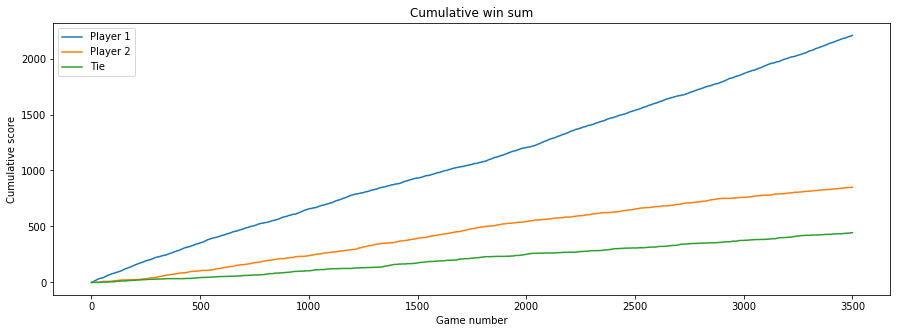

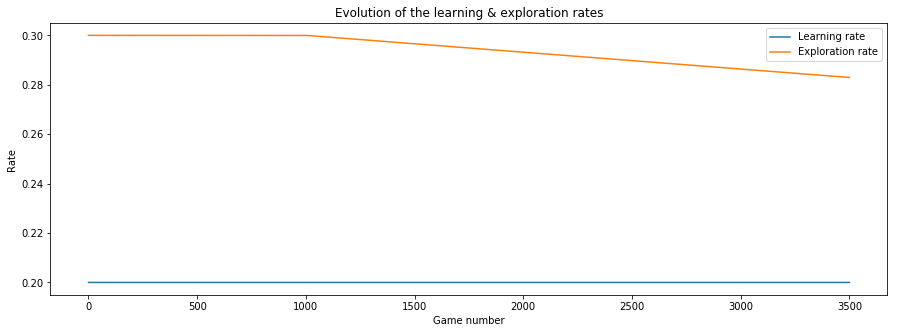

In [7]:
st.displayMetrics()

## Benchmark the policies
In this section, the policies will all play against the one with the largest iteration count in order to quantify their relative performance.

In [8]:
p1_policies, p2_policies = benchmark.loadAllPolicies()

In [9]:
p1win, p2win, tie = benchmark.benchmarkPolicies(p1_policies, p2_policies, **s)

In [10]:
print("P1 win matrix:\n", p1win)
print("P2 win matrix:\n", p2win)
print("Tie matrix:\n", tie)

P1 win matrix:
 [[62 20 71 28 39 19 66 21 37 23 36 24 38 31 29 75 29 21 35 39]
 [80 45 86 38 87 35 85 36 69 38 72 44 73 38 32 86 71 44 62 61]
 [62 32 47 20 61 29 50 23 44 15 52 20 56 12 31 70 35 27 45 47]
 [78 44 84 45 81 36 86 31 73 38 77 31 82 33 40 77 69 43 75 76]
 [59 30 73 29 63 23 57 27 50 30 50 27 50 27 23 75 41 28 44 49]
 [81 49 85 60 86 40 85 43 78 43 75 46 71 37 46 88 70 43 71 73]
 [71 43 62 21 64 30 55 24 53 30 55 26 51 22 24 90 51 34 46 56]
 [90 55 93 61 77 48 87 37 81 32 76 46 63 36 42 92 66 40 70 73]
 [65 45 73 45 71 35 70 32 60 36 73 25 43 37 29 87 47 33 49 34]
 [83 47 75 57 86 46 78 49 79 51 81 40 81 42 39 81 67 36 79 81]
 [80 38 79 28 75 28 78 37 74 34 72 34 75 43 37 82 34 29 57 53]
 [78 52 80 52 83 51 80 42 67 50 79 36 70 41 41 90 65 50 58 68]
 [87 39 78 28 78 29 77 30 74 30 59 28 69 37 49 75 47 32 52 56]
 [90 50 85 48 83 42 83 39 73 41 71 38 69 35 39 82 74 42 61 68]
 [88 59 84 44 83 46 83 43 78 38 70 43 70 43 35 85 63 42 70 61]
 [37 29 46 34 51 25 46 27 44 25 44 22 4

In [11]:
p1 = player.Player("p1", 1, s['pc1'], s['WIN'], exp_rate=0)
p1.loadPolicy("policies/p1_5000")

p2 = player.Player("p2", 2, s['pc2'], s['WIN'], exp_rate=0)
p2.loadPolicy("policies/p2_1000")

st = state.State(p1, p2, **s)
st.play(save_policies=None)

### Human vs Computer

In [12]:
p1 = player.Player("computer", 1, s['pc1'], s['WIN'], exp_rate=0)
p1.loadPolicy("policies/p1_50000")

p2 = player.HumanPlayer("Human", 2, s['pc2'], s['WIN'])

st = state.State(p1, p2, **s)
st.playComputerVsHuman()

-------------
|   |   | x | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------


KeyboardInterrupt: 